In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.datasets import make_moons, make_circles, make_classification

In [25]:
N = 150
noises = 0.05
random_state = 42

X_circle,y_circle = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )

In [26]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import  linkage
from scipy.cluster.hierarchy import fcluster

single_clustering = linkage(X_circle,
                            method="single",
                            metric="euclidean")

In [27]:

import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_circle, linkagefun=lambda x: single_clustering,
                                                          color_threshold = 0.25,
                                                          labels= y_circle)
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [6]:

# Determine clusters using a distance threshold (you can adjust 't' value based on dendrogram)
clusters = fcluster(single_clustering, t=0.25,
                    criterion='distance')

# Plot the circular data with cluster assignments
fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=clusters.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (Single Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()

In [8]:
def plot_dendrogram(model,write_split, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    ddata = dendrogram(linkage_matrix, **kwargs)

    plt.title('dendrogram')
    plt.xlabel('index')
    plt.ylabel('distance')
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        if y > write_split:
            plt.plot(x, y, 'o', c=c)
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                          textcoords='offset points',
                          va='top', ha='center')

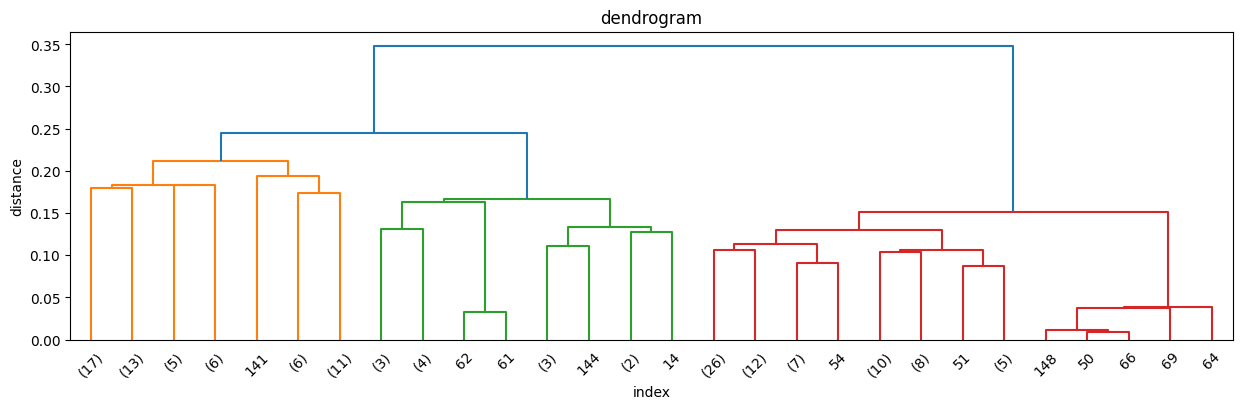

In [29]:
from itertools import cycle
from sklearn.cluster import AgglomerativeClustering

linkage = "single" #@param [ 'ward', 'average', 'complete', 'single']{type:"string"}

cluster = AgglomerativeClustering(distance_threshold=0,
                             n_clusters=None,
                             linkage=linkage)
cluster.fit(X_circle)
plt.figure(figsize=(15,4))
plt.title('dendogram')
plot_dendrogram(cluster,write_split=1, truncate_mode='level', p=4)
plt.xlabel("index");

In [30]:
dt = 0.25

model = AgglomerativeClustering(distance_threshold=dt,
                                n_clusters=None,
                                linkage=linkage)
model = model.fit(X_circle)
labels=model.fit_predict(X_circle)

fig_clusters = px.scatter(x=X_circle[:, 0],
                          y=X_circle[:, 1],
                          color=labels.astype(str),  # Color points by cluster
                          title="Circular Data with Hierarchical Clustering (Single Linkage)",
                          labels={'x': 'X-axis', 'y': 'Y-axis'},
                          width=600, height=600)

# Customize the plot appearance
fig_clusters.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')))
fig_clusters.update_layout(showlegend=True)

# Display the plot
fig_clusters.show()